可变对象和不可变对象

在Python中，对象分为两种：可变对象和不可变对象，不可变对象包括int，float，long，str，tuple等，可变对象包括list，set，dict等。

需要注意的是：这里说的不可变指的是值的不可变。要修改数据，必须在堆内存中创建另一个数据对象(因为原始的数据对象不允许修改)，并将这个新数据对象的地址保存到变量中,可变的意思是可以在堆内存原始数据结构内修改数据

对于不可变类型的变量，如果要更改变量，则会创建一个新值，把变量绑定到新值上，而旧值如果没有被引用就等待垃圾回收。

另外，不可变的类型可以计算hash值，作为字典的key。可变类型数据对对象操作的时候，不需要再在其他地方申请内存，只需要在此对象后面连续申请(+/-)即可，也就是它的内存地址会保持不变，但区域会变长或者变短。

可以看到当不可变对象，重新赋值时，要在内存中重新创建一个数据对象

In [147]:
a = 12
print(id(a))
a = 2
print(id(a))

1533194816
1533194496


对于可变对象，修改可变对象中的元素时，可变对象的地址不会变。但需要注意的是，这个被修改的元素可能是不可变对象，可能是可变对象，如果被修改的元素是不可变对象，就会创建一个新数据对象，并引用这个新数据对象，而原始的那个元素将等待垃圾回收器回收。

所以可变对象整体的地址没有改变，但内部元素的地址已经改变了，也就是旧的元素对象被回收。

In [148]:
L = [1, 2, 3]
print(id(L), id(L[1]))
L[1] = 999
print(id(L), id(L[1]))

2148062840648 1533194496
2148062840648 2148068023184


赋值 和 引用

当对象是不可变对象时，给已有变量赋值就会创建新对象,然后传新引用值给变量.

In [150]:
a = 12
b = a
print(id(a), id(b))
b = 19
print(id(a), id(b))

1533194816 1533194816
1533194816 1533195040


In [157]:
a = 10000
b = a

这样赋值后，b和a不仅在值上相等，而且是同一个对象，也就是说在堆内存中只有一个数据对象10000，这两个变量都指向这一个数据对象。从数据对象的角度上看，这个数据对象有两个引用，只有这两个引用都没了的时候，堆内存中的数据对象10000才会等待垃圾回收器回收。

它和下面的赋值过程是不等价的：虽然a和b的值相等，但他们不是同一个对象，这时候在堆内存中有两个数据对象，只不过这两个数据对象的值相等。

In [158]:
a = 1000
b = 1000

当对象可变时，直接把一个list赋值给另一个list,传给那个新list的其实也是引用.

In [155]:
myList = [12, 13, 144]
another = myList
another.append(9)
print(myList, another)
print(id(myList), id(another)) 

[12, 13, 144, 9]  [12, 13, 144, 9]
2148077158344 2148077158344


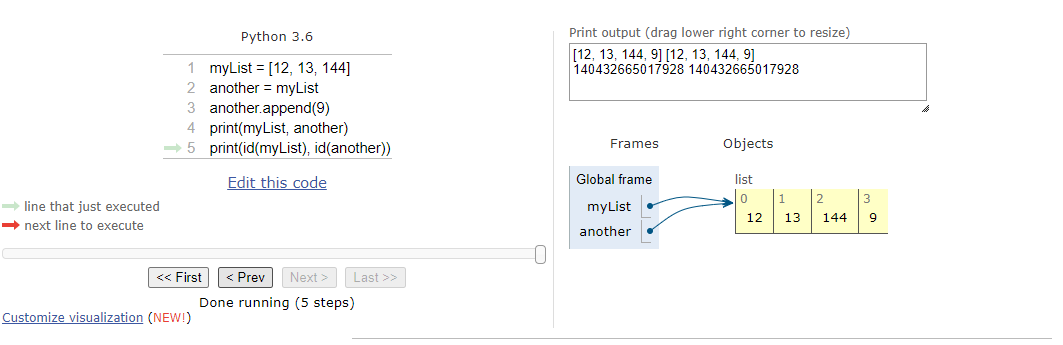

== 比较的是对象是否相等，is比较的是引用是否相等

In [156]:
#x, y的值相同但是引用的对象不同
x = [1, 2, 3]
y = [1, 2, 3]
print(x == y)
print(x is y)

True
False


拷贝分两种：浅拷贝 深拷贝

上面提到的直接赋值得到的其实是引用，要想拷贝就得使用别的操作,常见的有list的切片,list()方法,copy()方法.

In [159]:
#浅拷贝只拷贝第一层数据
alist = [12, 12, 23, [56, 78], 8888]
blist = alist[:]
clist = list(alist)

from copy import copy
dlist = copy(alist)
print(alist == dlist)
print(alist is dlist)
print(id(alist), id(dlist))

True
False
2148076011208 2147991941384


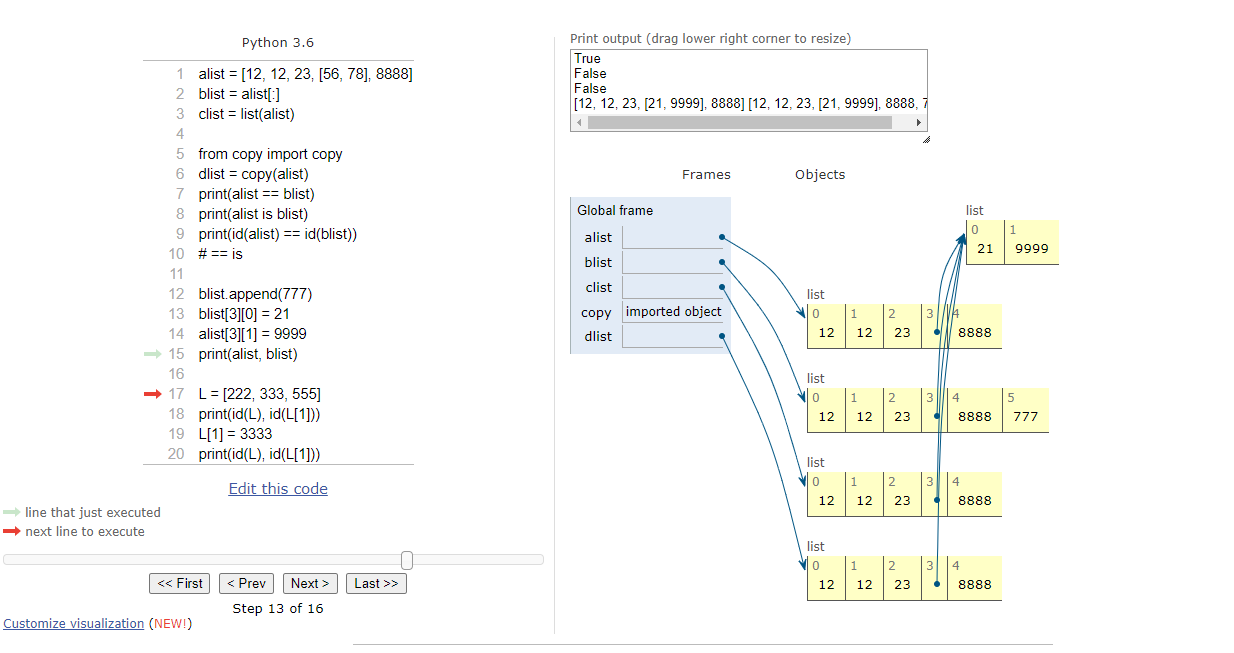

In [165]:
blist.append(777)
print(alist)
print(blist)

[12, 12, 23, [21, 999], 8888]
[12, 12, 23, [21, 999], 8888, 777, 777, 777, 777]


In [166]:
blist[3][0] = 21
alist[3][1] = 999
print(alist)
print(blist)

[12, 12, 23, [21, 999], 8888]
[12, 12, 23, [21, 999], 8888, 777, 777, 777, 777]


In [168]:
#深拷贝
alist = [12, 12, 23, [56, 78], 8888]

from copy import deepcopy
elist = deepcopy(alist)
alist[3][0] = 33333
print(alist)
print(elist)

[12, 12, 23, [33333, 78], 8888]
[12, 12, 23, [56, 78], 8888]


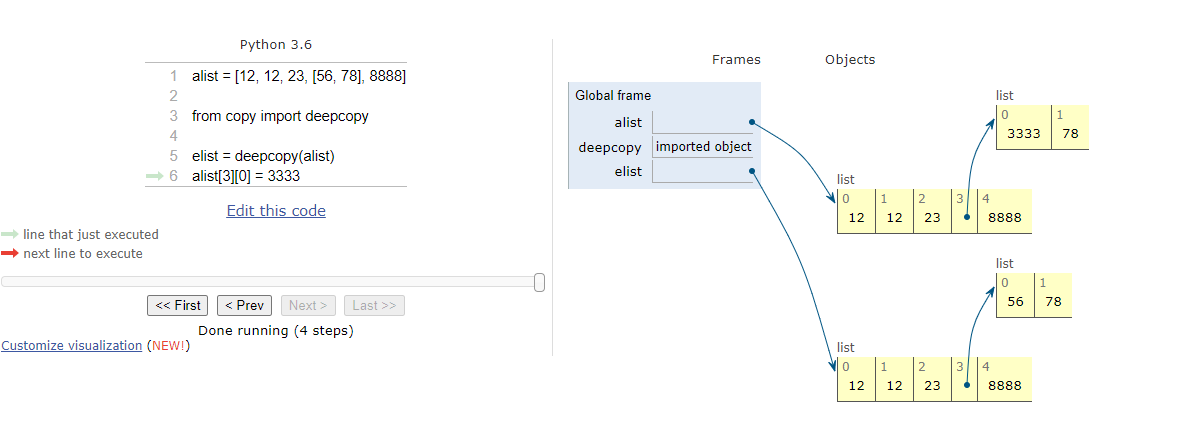

参考：
1. https://www.cnblogs.com/katachi/p/9571934.html
2. https://www.cnblogs.com/f-ck-need-u/p/10123145.html